#### 사이파이를 이용한 확률분포 분석

In [1]:
import scipy as sp
import scipy.stats

In [3]:
%matplotlib inline

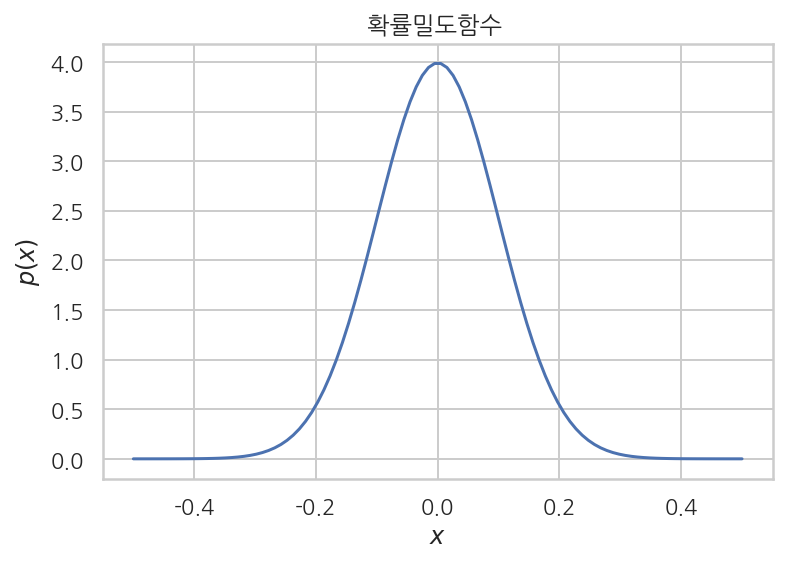

In [18]:
# 연습문제 8.1.1
rv = sp.stats.norm(loc=0, scale=0.1)

xx = np.linspace(-0.5, 0.5, 100)
pdf = rv.pdf(xx)
plt.figure(facecolor="1.")
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

표본평균:1.9547432925098047 비편향 표본분산:0.9742344563121544


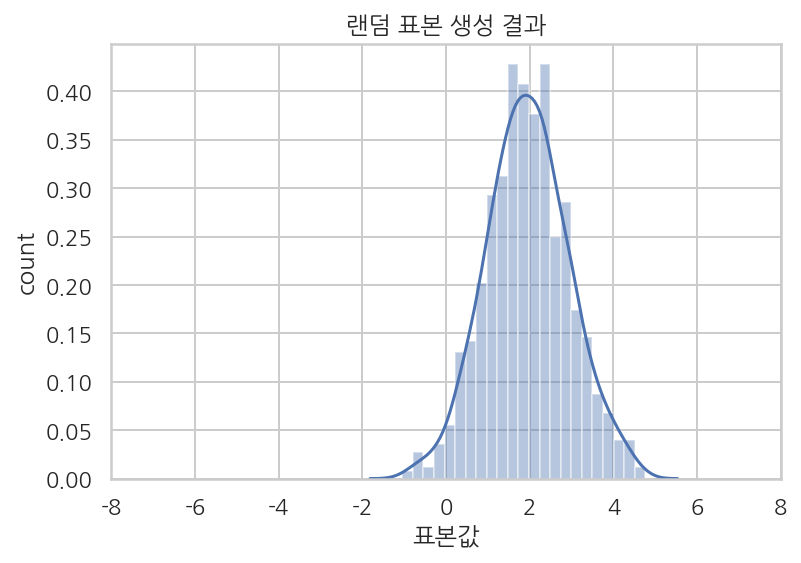

In [42]:
# 연습문제 8.1.2
rv2 = sp.stats.norm(loc=2, scale=1)
mean_rv2 = rv2.rvs(size=1000, random_state=0).mean()
var_rv2 = rv2.rvs(size=1000, random_state=0).var()
print("표본평균:{} 비편향 표본분산:{}".format(mean_rv2, var_rv2))
plt.figure(facecolor="1.")
sns.distplot(rv2.rvs(size=1000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

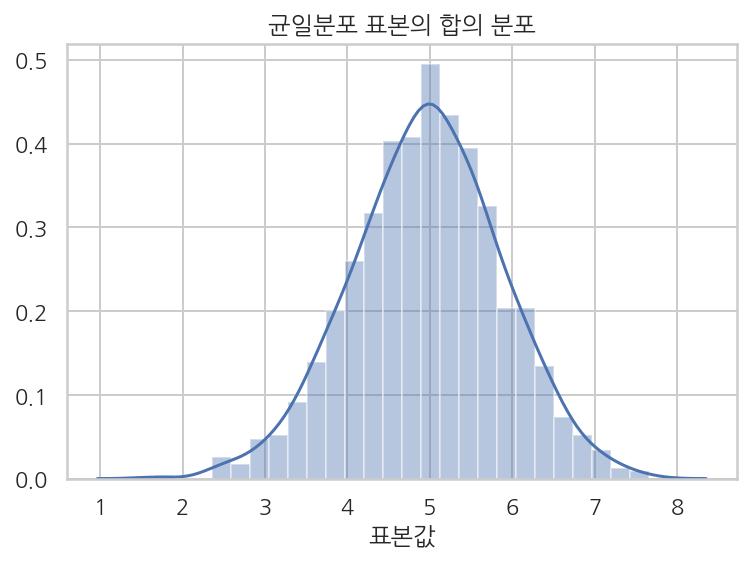

In [41]:
# 연습 문제 8.1.3
np.random.seed(0)
rv3 = sp.stats.uniform().rvs(size = (10, 1000))
s = rv3.sum(axis=0)

plt.figure(facecolor="1.")
sns.distplot(s)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")

plt.show()

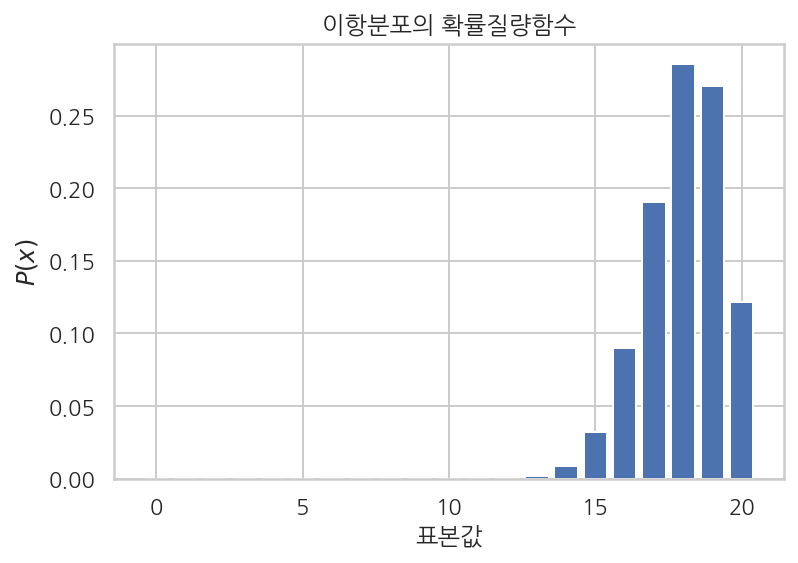

In [56]:
# 연습문제 8.2.3
# 표본개수 1000
mu = 0.9
N = 20
rv = sp.stats.binom(N,mu)
xx = np.arange(N + 1)

plt.figure(facecolor="1.")
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

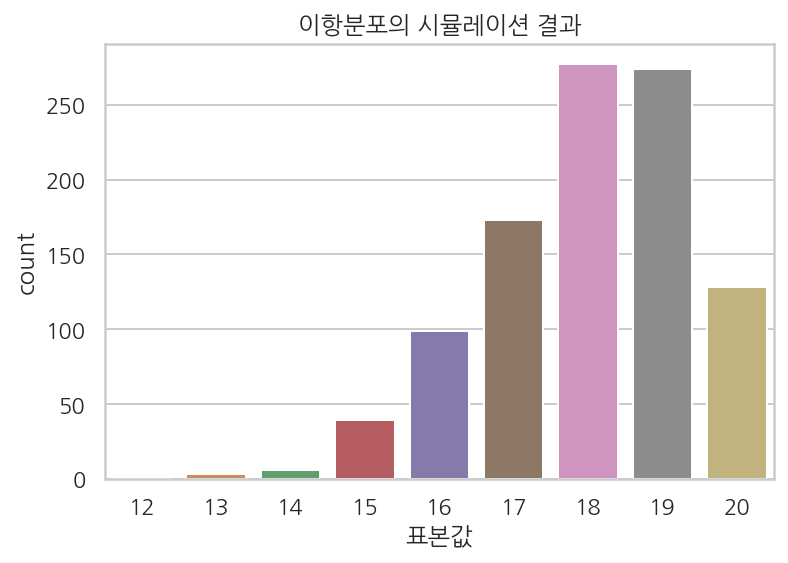

In [57]:
np.random.seed(0)
x = rv.rvs(1000)
plt.figure(facecolor="1.")
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [58]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,이론,1.000000e-20
1,0,시뮬레이션,0.000000e+00
2,1,이론,1.800000e-18
3,1,시뮬레이션,0.000000e+00
4,2,이론,1.539000e-16
5,2,시뮬레이션,0.000000e+00
6,3,이론,8.310600e-15
7,3,시뮬레이션,0.000000e+00
8,4,이론,3.178804e-13
9,4,시뮬레이션,0.000000e+00


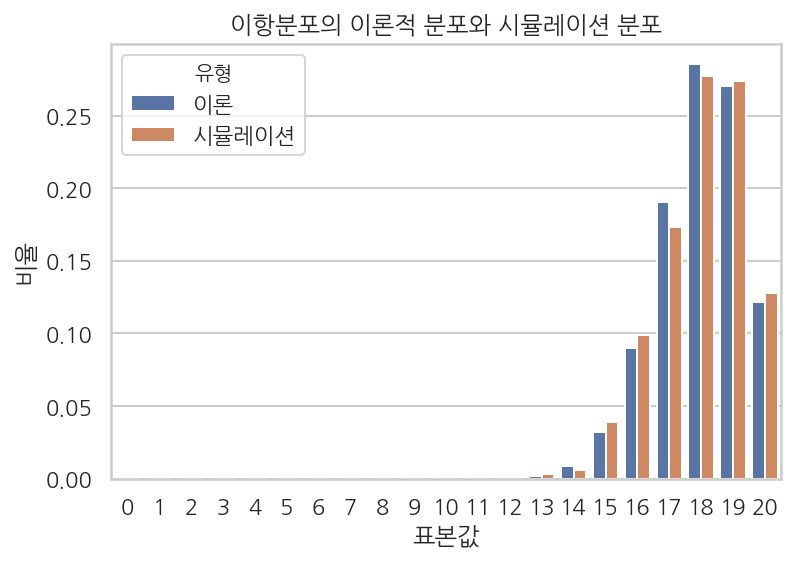

In [59]:
plt.figure(facecolor="1.")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()